# LAB 1 DATA ANALYSYS

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from seaborn import heatmap, histplot
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
from sklearn.utils import class_weight
import cv2
import os
from collections import Counter


random_state = 43
test_size = 0.3
y_name = 'is_safe'

## 1. Повнозв'язані нейронні мережі

Даний датасет
[waterQuality1.csv](https://www.kaggle.com/datasets/mssmartypants/water-quality/)

In [5]:
data = pd.read_csv('../waterQuality1.csv')
print(data.head())
print(data.shape)

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [6]:
data[y_name] = pd.to_numeric(data[y_name], errors='coerce')
data = data.dropna(subset=[y_name])
x_data = data.drop(y_name, axis=1)
x_name = x_data.columns
for i in x_name:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    mean_value = data[i].mean()
    std_dev = data[i].std()
    lower_bound = mean_value - 4 * std_dev
    upper_bound = mean_value + 4 * std_dev
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]
x_data = data.drop(y_name, axis=1)
y_data = data[y_name].astype(int)

# Scale the data
scaler = StandardScaler()
data_scaled_arr = scaler.fit_transform(x_data)
data_scaled = pd.DataFrame(data_scaled_arr, columns=x_name)
data_scaled[y_name] = y_data.values

<Axes: >

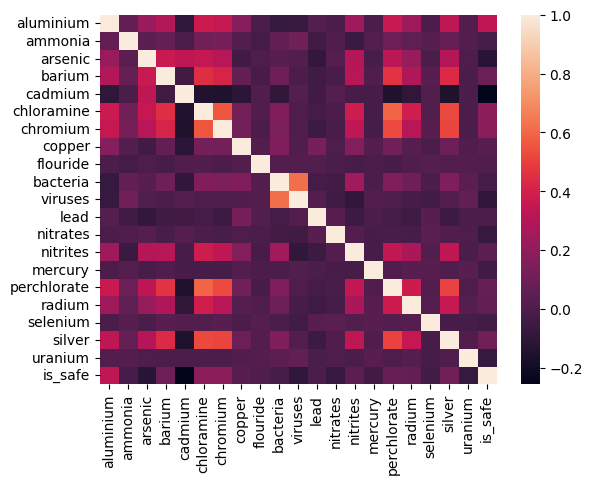

In [13]:
heatmap(data_scaled.corr(numeric_only=True), annot=False)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled.drop(y_name, axis=1), 
    data_scaled[y_name], 
    test_size=test_size, 
    random_state=random_state,
    stratify=data_scaled[y_name]
)

ініціалізація та навчання моделі MLP y tensorflow.keras

In [22]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # input
    Dropout(0.3),
    Dense(32, activation='relu'),  # mid
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # output
])

model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.3356 - val_accuracy: 0.9250 - val_loss: 0.1899
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9158 - loss: 0.2194 - val_accuracy: 0.9402 - val_loss: 0.1601
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9189 - loss: 0.2014 - val_accuracy: 0.9589 - val_loss: 0.1376
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.1737 - val_accuracy: 0.9339 - val_loss: 0.1539
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9263 - loss: 0.1770 - val_accuracy: 0.9536 - val_loss: 0.1230
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9413 - loss: 0.1567 - val_accuracy: 0.9527 - val_loss: 0.1260
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1599 - val_accuracy: 0.9580 - val_loss: 0.1221
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9408 - loss: 0.1533 - val_accuracy: 0.

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype("int32") # передбачення значень 


print(f"MLP Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MLP Accuracy: 0.9541

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2125
           1       0.88      0.70      0.78       274

    accuracy                           0.95      2399
   macro avg       0.92      0.84      0.88      2399
weighted avg       0.95      0.95      0.95      2399


Confusion Matrix:
[[2098   27]
 [  83  191]]


Для порівняння дерево:

In [27]:
clf = DecisionTreeClassifier(
    criterion="gini",  # "entropy"
    splitter="best", 
    max_depth=100, 
    random_state=random_state)

clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, Y_pred))

Accuracy: 0.9550
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2125
           1       0.79      0.82      0.81       274

    accuracy                           0.95      2399
   macro avg       0.88      0.90      0.89      2399
weighted avg       0.96      0.95      0.96      2399

Confusion Matrix:
[[2065   60]
 [  48  226]]


впринципі отримали однаковий перформанс класифікації, думаю проблема в даних

## 2. Згорткові нейронні мережі

Завантаження зображень з датасету
https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification

In [38]:
train_dir = 'archive/train'
test_dir = 'archive/test'

# data augmentation
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


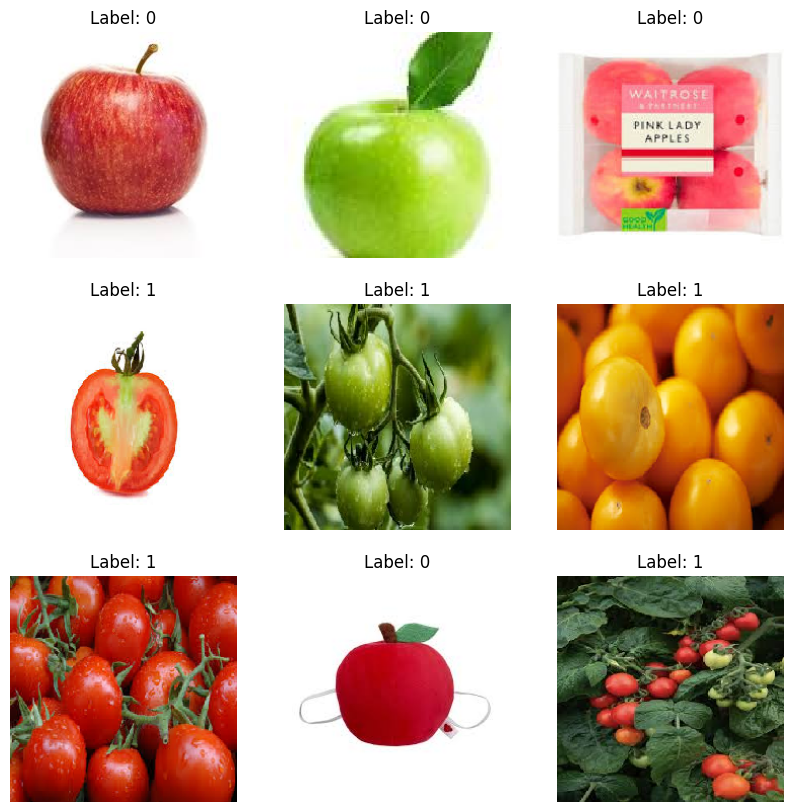

In [39]:
images, labels = next(test_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.show()

In [32]:
from keras.layers import Input

model_scratch = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Для бінарної класифікації
])

model_scratch.compile(optimizer=Adam(learning_rate=0.003), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

history_scratch = model_scratch.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5125 - loss: 4.6090 - val_accuracy: 0.5567 - val_loss: 0.7137
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5798 - loss: 0.6701 - val_accuracy: 0.5876 - val_loss: 0.6612
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6287 - loss: 0.6487 - val_accuracy: 0.5670 - val_loss: 0.6585
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5996 - loss: 0.6715 - val_accuracy: 0.5979 - val_loss: 0.6740
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6432 - loss: 0.6376 - val_accuracy: 0.5979 - val_loss: 0.6826
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6778 - loss: 0.6115 - val_accuracy: 0.6082 - val_loss: 0.6943
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6672 - loss: 0.6472 - val_accuracy: 0.6495 - val_loss: 0.6420
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6312 - loss: 0.6218 - val_accuracy: 0.5979 - val_loss:

In [22]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# pre trained set
base_model.trainable = False

model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Для бінарної класифікації
])

# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.01), 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])

initial_epochs = 15
history_transfer = model_transfer.fit(
    train_generator,
    epochs=initial_epochs,
    validation_data=test_generator
)

# fine tune
base_model.trainable = True
for layer in base_model.layers[:15]:
    layer.trainable = False

model_transfer.compile(optimizer=Adam(learning_rate=1e-5), 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])

fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs
history_fine_tune = model_transfer.fit(
    train_generator,
    epochs=total_epochs,
    validation_data=test_generator,
    initial_epoch=history_transfer.epoch[-1]
)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.5734 - loss: 8.8117 - val_accuracy: 0.8041 - val_loss: 2.4669
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - accuracy: 0.8012 - loss: 1.8997 - val_accuracy: 0.8144 - val_loss: 1.2786
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.8147 - loss: 0.9070 - val_accuracy: 0.8351 - val_loss: 0.4784
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8919 - loss: 0.2435 - val_accuracy: 0.8557 - val_loss: 0.4742
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9013 - loss: 0.2345 - val_accuracy: 0.8660 - val_loss: 0.5051
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.9513 - loss: 0.1570 - val_accuracy: 0.8351 - val_loss: 0.5051
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.9115 - loss: 0.2164 - val_accuracy: 0.8557 - val_loss: 0.4079
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - accuracy: 0.9599 - loss: 0.1186 - val_accuracy: 0.8660 - val_loss:

C:\Users\Volodymyr\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6504 - loss: 0.6090
Test accuracy (from scratch): 0.6494845151901245
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8599 - loss: 0.6597
Test accuracy (transfer learning): 0.8659793734550476


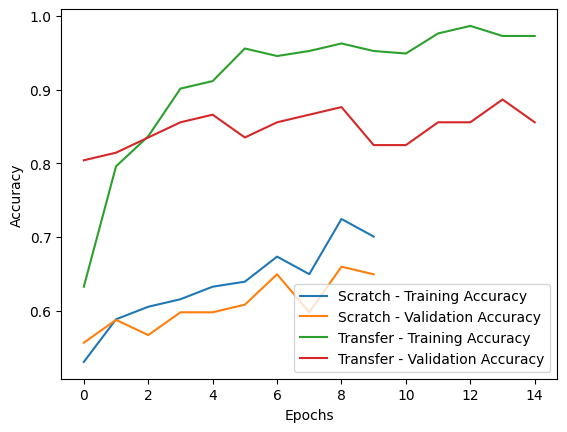

In [40]:
# метрики оцінки точності на навчанні
test_loss_scratch, test_acc_scratch = model_scratch.evaluate(test_generator)
print(f"Test accuracy (from scratch): {test_acc_scratch}")
test_loss_transfer, test_acc_transfer = model_transfer.evaluate(test_generator)
print(f"Test accuracy (transfer learning): {test_acc_transfer}")

plt.plot(history_scratch.history['accuracy'], label='Scratch - Training Accuracy')
plt.plot(history_scratch.history['val_accuracy'], label='Scratch - Validation Accuracy')
plt.plot(history_transfer.history['accuracy'], label='Transfer - Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

прогноз і оціночки

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step
Classification Report (from scratch):
              precision    recall  f1-score   support

           0       0.55      0.67      0.60        54
           1       0.42      0.30      0.35        43

    accuracy                           0.51        97
   macro avg       0.48      0.48      0.48        97
weighted avg       0.49      0.51      0.49        97

Classification Report (transfer learning):
              precision    recall  f1-score   support

           0       0.58      0.57      0.58        54
           1       0.48      0.49      0.48        43

    accuracy                           0.54        97
   macro avg       0.53      0.53      0.53        97
weighted avg       0.54      0.54      0.54        97



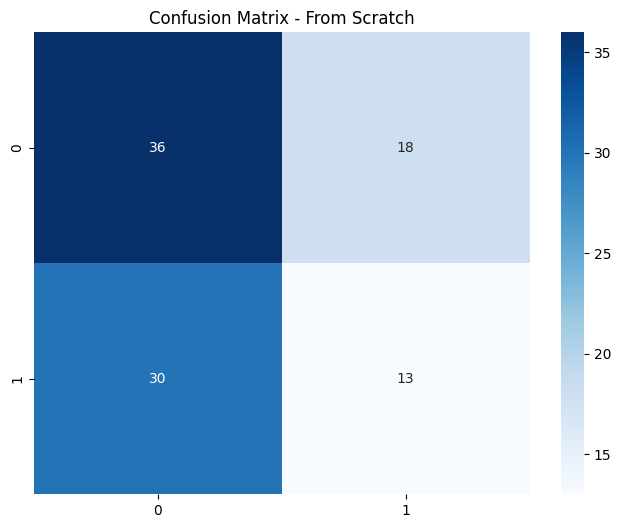

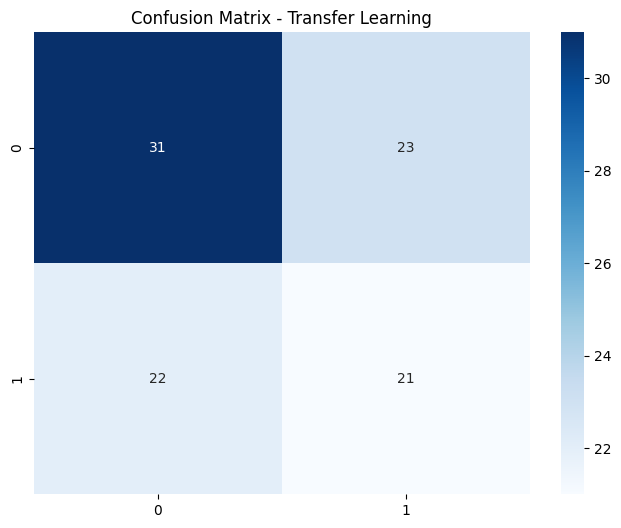

In [43]:
y_pred_scratch = (model_scratch.predict(test_generator) > 0.5).astype("int32").flatten()
y_pred_transfer = (model_transfer.predict(test_generator) > 0.5).astype("int32").flatten()

print("Classification Report (from scratch):")
print(classification_report(test_generator.classes, y_pred_scratch))
print("Classification Report (transfer learning):")
print(classification_report(test_generator.classes, y_pred_transfer))

conf_matrix_scratch = confusion_matrix(test_generator.classes, y_pred_scratch)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scratch, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - From Scratch")
plt.show()
conf_matrix_transfer = confusion_matrix(test_generator.classes, y_pred_transfer)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_transfer, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Transfer Learning")
plt.show()

модель зі скретчу дуже легко перенавчається, а перенесені ваги трохи точніші загалом
- основна причина що задача важка, помідори і яблука дуже схожі))) 

## 3. Рекурентні нейронні мережі

In [4]:
train_data = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
test_data = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')
print(len(train_data))
print(len(test_data))

41157
3798


In [5]:
sentiment_mapping = {
    'Extremely Positive': 'Positive',
    'Positive': 'Positive',
    'Neutral': 'Neutral',
    'Negative': 'Negative',
    'Extremely Negative': 'Negative'
}

train_data['Sentiment'] = train_data['Sentiment'].map(sentiment_mapping)
test_data['Sentiment'] = test_data['Sentiment'].map(sentiment_mapping)

print(train_data['Sentiment'].value_counts())

Sentiment
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


стоп слова більш актуальні в цей раз

In [10]:
def extract_stopwords_from_texts(texts, threshold=0.004):
    all_words = ' '.join(texts).split()
    total_words = len(all_words)
    
    if total_words == 0:
        return set()
    
    word_counts = Counter(all_words)
    stopwords = {word for word, count in word_counts.items() if count / total_words > threshold}
    
    return stopwords

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

train_data['cleaned_tweet'] = train_data['OriginalTweet'].apply(preprocess_text)
test_data['cleaned_tweet'] = test_data['OriginalTweet'].apply(preprocess_text)

train_texts = train_data['cleaned_tweet'].dropna().tolist() + test_data['cleaned_tweet'].dropna().tolist()  # Ensure no NaN values are processed
stopwords = extract_stopwords_from_texts(train_texts)
print("Generated Stopwords:", stopwords)


Generated Stopwords: {'store', 'food', 'shopping', 'consumer', 'coronavirus', 'covid19', 'grocery', 'prices', 'people', '19', 'amp', 'supermarket', 'online'}


In [14]:
# Tokenization, padding, and encoding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['cleaned_tweet'])

X_train = tokenizer.texts_to_sequences(train_data['cleaned_tweet'])
X_test = tokenizer.texts_to_sequences(test_data['cleaned_tweet'])

print(X_test[0:10])

max_length = 100
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

# Encoding labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Sentiment'])
y_test = label_encoder.transform(test_data['Sentiment'])

print(y_test[0:10])

[[2093, 35, 1, 1, 143, 6, 53, 1, 4352, 3664, 1, 14, 1901, 1, 1, 1, 250, 30, 1, 1], [1876, 122, 29, 23, 1, 1, 1715, 192, 1, 58, 779, 1, 2, 638, 801, 4, 1], [122, 202, 1682, 628, 2], [21, 36, 1373, 3590, 409, 2291, 250, 30, 1, 107, 248, 364, 1, 2113, 1, 1090, 1103, 2, 1786, 1, 1, 1371, 1, 4790, 1, 1, 1, 1467, 1], [40, 1, 2, 3228, 376, 3, 1, 1, 1, 1, 1429, 32, 88, 74, 36, 975, 325, 1, 156, 74, 36, 42, 44, 1], [324, 110, 24, 457, 1, 1588, 965, 135, 2287, 1, 2226, 31, 163, 2, 1112, 4, 1, 1, 1], [4263, 980, 2, 29, 23, 1, 1], [1, 260, 67, 3, 208, 1458, 1, 4, 1542, 77, 214, 1, 1031, 3332, 1, 10, 1, 538, 2779, 1, 2], [877, 1463, 1, 466, 29, 23, 664, 1, 22, 77, 487, 706, 1154, 642, 87, 354, 375, 1, 1028, 259, 110, 709, 1028, 172, 348, 9], [181, 6, 110, 128, 151, 302, 91, 110, 711, 10, 3089, 1, 1, 3543, 1197, 433, 3078, 1, 3, 1, 1]]
[0 2 2 0 1 1 2 1 0 2]


Навчання та формулювання рекурентної моделі

In [17]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

embedding_dim = 100
num_classes = y_train_encoded.shape[1]

model_scratch = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.1),
    Bidirectional(LSTM(32)),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')  # multi-class classification
])

model_scratch.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

class_weights = class_weight.compute_class_weight('balanced', 
                                                   classes=np.unique(y_train), 
                                                   y=y_train)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Training model from scratch...")
history = model_scratch.fit(X_train_padded, y_train_encoded, 
                             epochs=10,
                             validation_split=0.2, 
                             class_weight=class_weights_dict,
                             verbose=1)

Training model from scratch...
Epoch 1/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 104s 97ms/step - accuracy: 0.6022 - loss: 0.8193 - val_accuracy: 0.8389 - val_loss: 0.4825
Epoch 2/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 109s 106ms/step - accuracy: 0.8500 - loss: 0.4453 - val_accuracy: 0.8454 - val_loss: 0.4590
Epoch 3/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 93s 90ms/step - accuracy: 0.8755 - loss: 0.3837 - val_accuracy: 0.8435 - val_loss: 0.4789
Epoch 4/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 97s 94ms/step - accuracy: 0.8893 - loss: 0.3301 - val_accuracy: 0.8308 - val_loss: 0.5139
Epoch 5/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 94s 92ms/step - accuracy: 0.8999 - loss: 0.2844 - val_accuracy: 0.8314 - val_loss: 0.5437
Epoch 6/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 99s 96ms/step - accuracy: 0.9203 - loss: 0.2252 - val_accuracy: 0.8174 - val_loss: 0.5845
Epoch 7/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.9299 - loss: 0.1992 - val_accuracy: 0.8113 - val_loss: 0.6872
Epoch 8/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 

Передбачення значень 

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7623 - loss: 0.9005
Test accuracy: 0.758293867111206
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


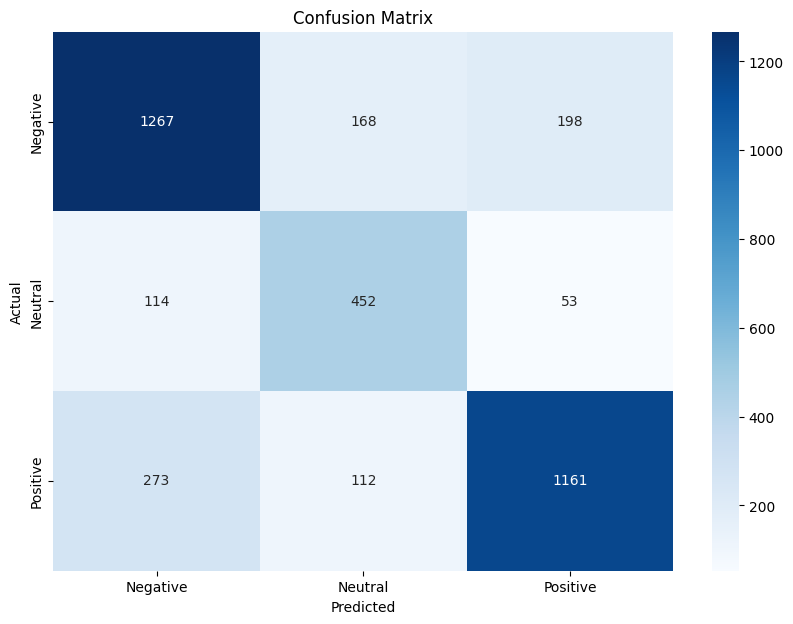

              precision    recall  f1-score   support

    Negative       0.77      0.78      0.77      1633
     Neutral       0.62      0.73      0.67       619
    Positive       0.82      0.75      0.78      1546

    accuracy                           0.76      3798
   macro avg       0.74      0.75      0.74      3798
weighted avg       0.76      0.76      0.76      3798



In [18]:
loss_scratch, acc_scratch = model_scratch.evaluate(X_test_padded, y_test_encoded, verbose=1)
print(f"Test accuracy: {acc_scratch}")

y_pred = model_scratch.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

Встановлення ваг з стандартної моделі GloVe glove.6B.100d.txt - файлик з вагами на 300 мб + аналогічна модель

Epoch 1/10


C:\Users\Volodymyr\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1029/1029 ━━━━━━━━━━━━━━━━━━━━ 97s 86ms/step - accuracy: 0.6015 - loss: 0.8711 - val_accuracy: 0.7872 - val_loss: 0.5740
Epoch 2/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.7820 - loss: 0.5831 - val_accuracy: 0.8240 - val_loss: 0.5308
Epoch 3/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.8148 - loss: 0.5212 - val_accuracy: 0.8379 - val_loss: 0.4812
Epoch 4/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.8268 - loss: 0.4879 - val_accuracy: 0.8423 - val_loss: 0.4644
Epoch 5/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.8350 - loss: 0.4625 - val_accuracy: 0.8405 - val_loss: 0.4743
Epoch 6/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.8346 - loss: 0.4584 - val_accuracy: 0.8358 - val_loss: 0.4763
Epoch 7/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 89s 87ms/step - accuracy: 0.8488 - loss: 0.4310 - val_accuracy: 0.8433 - val_loss: 0.4737
Epoch 8/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 90s 88ms/step - accuracy: 0.8510 - loss: 0.41

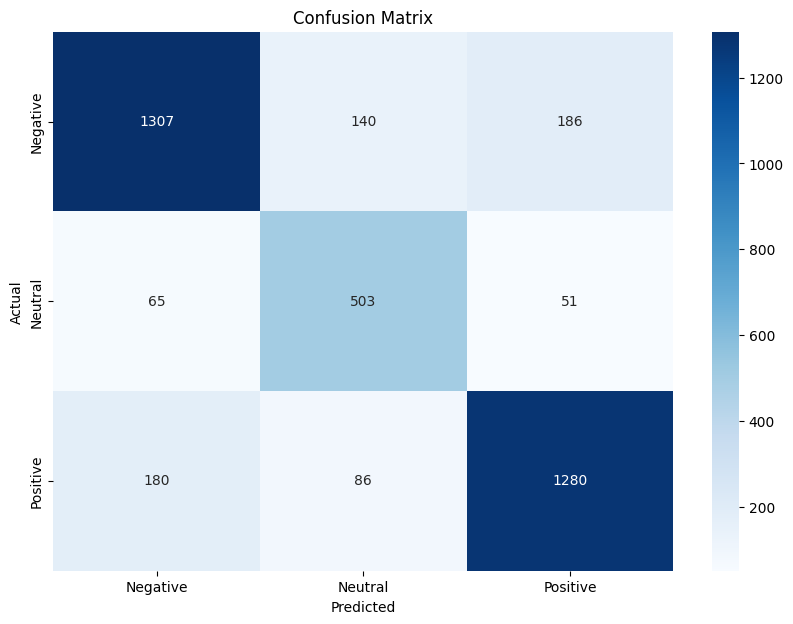

              precision    recall  f1-score   support

    Negative       0.84      0.80      0.82      1633
     Neutral       0.69      0.81      0.75       619
    Positive       0.84      0.83      0.84      1546

    accuracy                           0.81      3798
   macro avg       0.79      0.81      0.80      3798
weighted avg       0.82      0.81      0.81      3798



In [47]:
max_length = 100  # Adjust as necessary
vocab_size = 5000
embedding_dim = 100
num_classes = y_train_encoded.shape[1]

embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coeffs

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model_pretrained = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, 
              weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.1),
    Bidirectional(LSTM(32)),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

model_pretrained.compile(optimizer=Adam(learning_rate=0.01), 
                         loss='categorical_crossentropy', 
                         metrics=['accuracy'])

class_weights = class_weight.compute_class_weight('balanced', 
                                                   classes=np.unique(y_train), 
                                                   y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

history = model_pretrained.fit(X_train_padded, y_train_encoded, 
                               epochs=10, 
                               validation_split=0.2, 
                               class_weight=class_weights_dict,
                               verbose=1)

loss_pretrained, acc_pretrained = model_pretrained.evaluate(X_test_padded, y_test_encoded, verbose=1)
print(f"Test accuracy: {acc_pretrained}")

y_pred = model_pretrained.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

В результаті отримали схожий результат з власне навченою моделлю + може трохи краще

Accuracy (Logistic Regression): 0.7677725118483413
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    Negative       0.82      0.75      0.78      1633
     Neutral       0.55      0.77      0.65       619
    Positive       0.84      0.78      0.81      1546

    accuracy                           0.77      3798
   macro avg       0.74      0.77      0.75      3798
weighted avg       0.79      0.77      0.77      3798



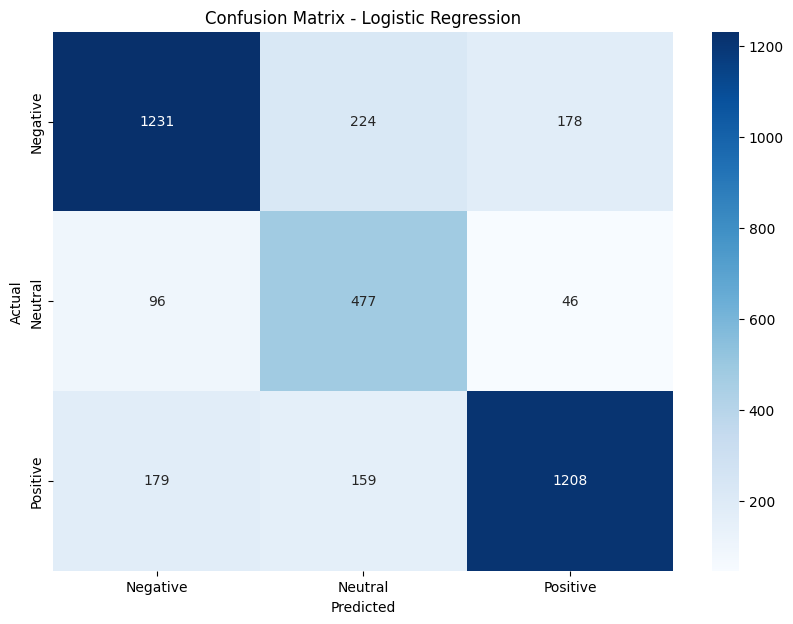

In [27]:
train_texts = [' '.join([str(token) for token in sequence]) for sequence in X_train]
test_texts = [' '.join([str(token) for token in sequence]) for sequence in X_test]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
X_test_tfidf = tfidf_vectorizer.transform(test_texts)

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_tfidf, y_train)

y_pred_logistic = logistic_model.predict(X_test_tfidf)
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logistic))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_))

conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

У порівнянні нейронки загалом краще підходять для даної задачі